In [22]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [23]:
df = pd.read_csv('sumperday.csv')
df.tail()

,tran_date,carbon_emission_per_type
56,2024-07-27,21584.46
57,2024-07-28,21228.63
58,2024-07-29,20303.16
59,2024-07-30,23912.09
60,2024-07-31,31412.19


In [24]:
df.rename(columns={'tran_date': 'ds', 'carbon_emission_per_type': 'y'}, inplace=True)
df_actual=df
df_predict=df

In [25]:
df_predict = df_predict.iloc[:-5]
df_predict

,ds,y
0,2024-06-01,28605.88
1,2024-06-02,22414.10
2,2024-06-03,21558.78
3,2024-06-04,22118.34
4,2024-06-05,24539.13
5,2024-06-06,22777.76
6,2024-06-07,22720.58
7,2024-06-08,20532.87
8,2024-06-09,19695.13
9,2024-06-10,23812.97


In [26]:
m = Prophet()
m.fit(df_predict)

01:58:46 - cmdstanpy - INFO - Chain [1] start processing
01:58:46 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
81,2024-08-21
82,2024-08-22
83,2024-08-23
84,2024-08-24
85,2024-08-25


In [28]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.to_csv('Data/data.txt', sep='\t', index=False)


In [29]:
df_actual.tail()

,ds,y
56,2024-07-27,21584.46
57,2024-07-28,21228.63
58,2024-07-29,20303.16
59,2024-07-30,23912.09
60,2024-07-31,31412.19


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
forecast['ds'] = pd.to_datetime(forecast['ds'])
df_actual['ds'] = pd.to_datetime(df_actual['ds'])
df_merged = forecast[['ds', 'yhat']].merge(df_actual, on='ds')
mae = mean_absolute_error(df_merged['y'], df_merged['yhat'])
mse = mean_squared_error(df_merged['y'], df_merged['yhat'])
mape = (abs((df_merged['y'] - df_merged['yhat']) / (df_merged['y'] + 1e-10))).mean() * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")



Mean Absolute Error (MAE): 1740.6133492749345
Mean Squared Error (MSE): 5256516.633957447
Mean Absolute Percentage Error (MAPE): 7.370128884019684%


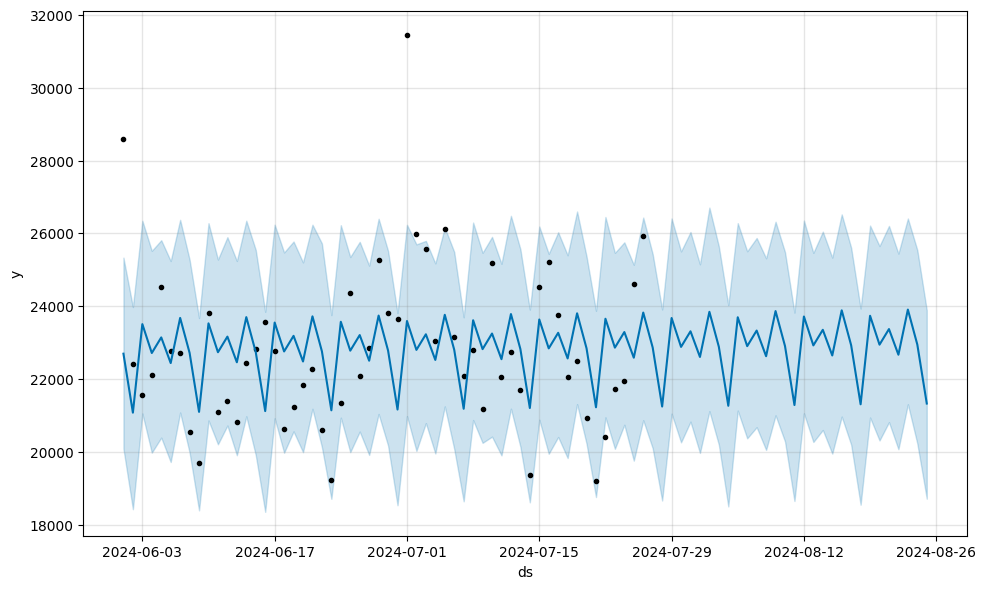

In [31]:
fig1 = m.plot(forecast)


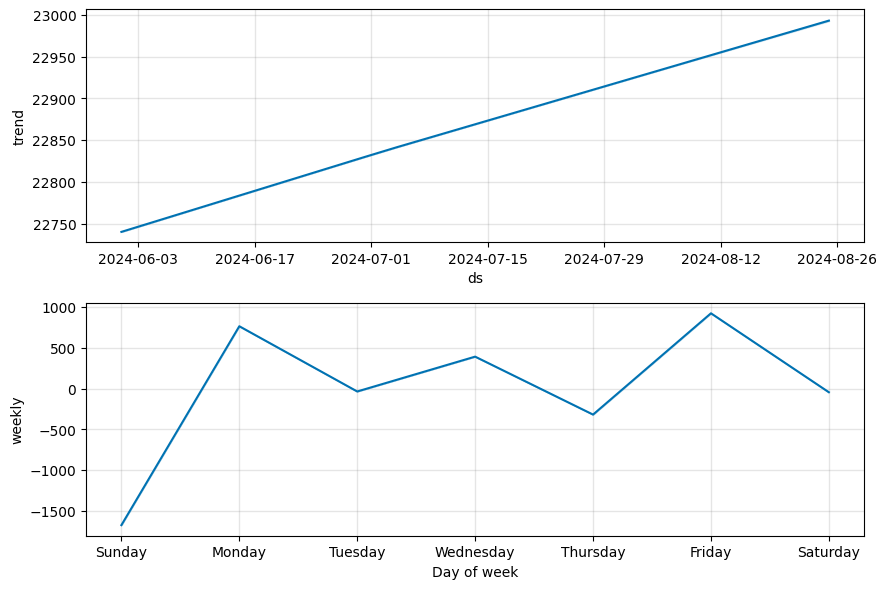

In [32]:
fig2 = m.plot_components(forecast)


In [33]:
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objs as go

fig = plot_plotly(m, forecast)

# Save as a PNG file
fig.write_image("forecast_plot.png")

In [34]:
fig.write_image("forecast_plot.png", width=800, height=435, scale=2)

In [35]:
plot_components_plotly(m, forecast)


In [36]:
df1=pd.read_csv('sumperday.csv')

In [37]:
df1.rename(columns={'tran_date': 'ds', 'carbon_emission_per_type': 'y'}, inplace=True)


In [38]:
m = Prophet()
m.fit(df1)

01:58:47 - cmdstanpy - INFO - Chain [1] start processing
01:58:47 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
116,2024-09-25
117,2024-09-26
118,2024-09-27
119,2024-09-28
120,2024-09-29


In [40]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
116,2024-09-25,24936.303279,21937.599440,27886.142052
117,2024-09-26,23354.596539,20364.283238,26315.921265
118,2024-09-27,24594.774459,21683.538260,27585.351282
119,2024-09-28,23514.728139,20645.536266,26331.548150
120,2024-09-29,22035.047491,19229.280624,24763.503327
